In [1]:
import os
import pandas as pd
import random
import shutil
import numpy as np

def num_files(data_path):
    df = []
    
    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        if os.path.isdir(class_path):
            num_files = len(os.listdir(class_path))
            df.append((class_name, num_files))

    return pd.DataFrame(df, columns=['Class', 'Num Files'])

In [2]:
os.chdir("..") 
from src import feature_extraction, models, utils

def train_participant(df, random_state, cm, print_metrics, print_vol_labels):
    x = df.drop(columns=['volume', 'substance'])
    y = df[['substance', 'volume']]
    
    acc, label_acc = models.train_multioutput_models(x, y, random_state, cm, print_metrics)

    if print_vol_labels:
        volume_labels = np.unique(y['volume'])
        df_volume_labels = pd.DataFrame(volume_labels, columns=['volume'])
        print(df_volume_labels)
        
    return acc, label_acc

In [3]:
exclude = ['oral prep 0', 'apple 20', 'yogurt 20', 'chewing 0', 'grape 5', 'popcorn 1', 'redu oral prep 0', 'carrot 5']

## Training classifiers on each participant

In [4]:
path_p1 = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\1\extracted signals'   
df_p1, map_p1 = feature_extraction.make_df(path_p1, exclude)
print(map_p1)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'water': 4, 'yogurt': 5}


In [5]:
acc_p1, label_acc_p1 = train_participant(df_p1, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_41824\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 95.8333
Per-Label Accuracies: [97.91666667 97.91666667]
----------------------------
KNN
Exact Match Accuracy: 93.7500
Per-Label Accuracies: [ 93.75 100.  ]
----------------------------
Decision Tree
Exact Match Accuracy: 91.6667
Per-Label Accuracies: [93.75       97.91666667]
----------------------------
Naive Bayes
Exact Match Accuracy: 75.0000
Per-Label Accuracies: [93.75       79.16666667]
----------------------------
Logistic Regression
Exact Match Accuracy: 97.9167
Per-Label Accuracies: [ 97.91666667 100.        ]
----------------------------
Gradient Boost
Exact Match Accuracy: 93.7500
Per-Label Accuracies: [93.75       97.91666667]
----------------------------
   volume
0       0
1      10
2      20


In [6]:
path_p2 = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\2\extracted signals'
df_p2, map_p2 = feature_extraction.make_df(path_p2, exclude)
print(map_p2)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'water': 4, 'yogurt': 5}


In [7]:
acc_p2, label_acc_p2 = train_participant(df_p2, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_41824\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [75.  87.5]
----------------------------
KNN
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [62.5 87.5]
----------------------------
Decision Tree
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [37.5 87.5]
----------------------------
Naive Bayes
Exact Match Accuracy: 75.0000
Per-Label Accuracies: [87.5 87.5]
----------------------------
Logistic Regression
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [75.  87.5]
----------------------------
Gradient Boost
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [62.5 75. ]
----------------------------
   volume
0       0
1      10
2      20


In [8]:
path_p3 = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\3\extracted signals'
df_p3, map_p3 = feature_extraction.make_df(path_p3, exclude)
print(map_p3)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'water': 4, 'yogurt': 5}


In [9]:
acc_p3, label_acc_p3 = train_participant(df_p3, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_41824\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [75.  62.5]
----------------------------
KNN
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [87.5 62.5]
----------------------------
Decision Tree
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [50. 50.]
----------------------------
Naive Bayes
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [75.  62.5]
----------------------------
Logistic Regression
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [75. 75.]
----------------------------
Gradient Boost
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [37.5 62.5]
----------------------------
   volume
0       0
1      10
2      20


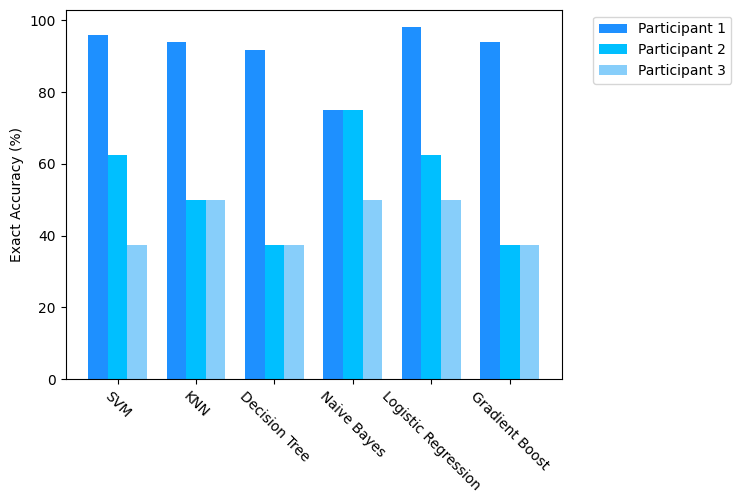

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from src.models import single_models

model_names = [name for name, _ in single_models]

x = np.arange(len(single_models))  # [0, 1, 2]
width = 0.25  # width of each bar

# Plot bars side by side
plt.bar(x - width, acc_p1, width, label='Participant 1', color='dodgerblue')
plt.bar(x, acc_p2, width, label='Participant 2', color='deepskyblue')
plt.bar(x + width, acc_p3, width, label='Participant 3', color='lightskyblue')

# Add labels
plt.xticks(x, model_names, rotation=-45)
plt.ylabel('Exact Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

Participant 1 has many more samples than participants 2 and 3, so I limited the number of samples used from participant 1 to be equal to participants 2 and 3.

In [11]:
df_limited_p1 = df_p1.groupby(['substance', 'volume']).apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_41824\3880676526.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_limited_p1 = df_p1.groupby(['substance', 'volume']).apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True)
C:\Users\chloe\AppData\Local\Temp\ipykernel_41824\3880676526.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_limited_p1 = df_p1.groupby(['substance', 'volume']).apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True)


In [12]:
acc_lim_p1, label_acc_lim_p1 = train_participant(df_limited_p1, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_41824\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 75.0000
Per-Label Accuracies: [100.  75.]
----------------------------
KNN
Exact Match Accuracy: 87.5000
Per-Label Accuracies: [100.   87.5]
----------------------------
Decision Tree
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [62.5 87.5]
----------------------------
Naive Bayes
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [87.5 75. ]
----------------------------
Logistic Regression
Exact Match Accuracy: 87.5000
Per-Label Accuracies: [100.   87.5]
----------------------------
Gradient Boost
Exact Match Accuracy: 75.0000
Per-Label Accuracies: [87.5 75. ]
----------------------------
   volume
0       0
1      10
2      20


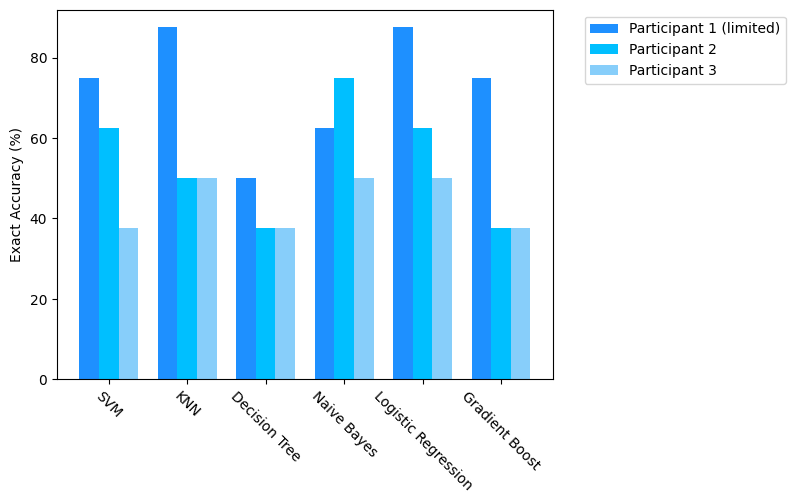

In [13]:
# Plot bars side by side
plt.bar(x - width, acc_lim_p1, width, label='Participant 1 (limited)', color='dodgerblue')
plt.bar(x, acc_p2, width, label='Participant 2', color='deepskyblue')
plt.bar(x + width, acc_p3, width, label='Participant 3', color='lightskyblue')

# Add labels
plt.xticks(x, model_names, rotation=-45)
plt.ylabel('Exact Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

## Training on all participant data

In [14]:
all_participants = pd.concat([df_limited_p1, df_p2, df_p3], axis=0)
all_participants

substance volume         1                                               \
                          min      max        mav        rms    wavelength   
0          0     10  -82.3953  84.7438  10.532140  16.572327   8938.223938   
1          0     10  -88.7979  83.8474   9.786745  15.110132   8462.514306   
2          0     10 -128.2250  92.8075  12.894846  22.051418  10825.215147   
3          0     10 -110.6930  97.9600  10.575004  18.209411   9086.891291   
4          0     10  -85.8436  64.2628  10.777697  16.439146   9150.173058   
..       ...    ...       ...      ...        ...        ...           ...   
35         5     10  -63.9541  72.2357  13.076436  17.415477  15498.935331   
36         5     10  -86.1039  67.9453  12.480544  16.866867  15387.195046   
37         5     10  -66.9294  66.4570  13.246470  17.656275  15506.199016   
38         5     10  -81.6146  83.1651  13.054595  17.908864  14503.207393   
39         5     10  -97.7972  81.3140  13.341329  18.231295  15144.190226   

                                                 ...        21     22         \
           var abs_diffs_signal shannon_entropy  ...      iemg    min    max   
0   274.641479      8938.223938        3.289639  ...   4222820 -13160  14560   
1   228.315945      8462.514306        3.187249  ...   2735180 -12880  10780   
2   486.264958     10825.215147        3.115120  ...   3971100 -14420  11480   
3   331.582607      9086.891291        2.962986  ...   4499180 -19460  14700   
4   270.245230      9150.173058        3.497589  ...   3358320 -12320  10080   
..         ...              ...             ...  ...       ...    ...    ...   
35  303.298301     15498.935331        3.915314  ...   9545620 -13020  31500   
36  284.490971     15387.195046        3.664392  ...  10166380 -20020  33180   
37  311.742098     15506.199016        3.977486  ...  10830820 -19180  23940   
38  320.724537     14503.207393        3.660768  ...  10317020 -19740  26040   
39  332.379973     15144.190226        3.560670  ...  10367140 -21560  21000   

                                                                    \
        mav          rms wavelength           var abs_diffs_signal   
0   4577.86  5597.687773     391580  3.078873e+07           391580   
1   3397.24  4320.741140     395500  1.861505e+07           395500   
2   2972.34  4003.199570     406280  1.563100e+07           406280   
3   4790.38  6103.433231     422380  3.696092e+07           422380   
4   2697.10  3833.032794     345240  1.468730e+07           345240   
..      ...          ...        ...           ...              ...   
35  4806.48  7420.795052     283080  5.506818e+07           283080   
36  5386.22  8316.637518     358820  6.905886e+07           358820   
37  5178.88  7074.234771     336140  4.974790e+07           336140   
38  4370.38  6999.656992     301420  4.828889e+07           301420   
39  4276.72  6234.512972     347060  3.885161e+07           347060   

                             
   shannon_entropy     iemg  
0         4.487950  4577860  
1         4.375849  3397240  
2         4.115409  2972340  
3         4.223237  4790380  
4         4.134484  2697100  
..             ...      ...  
35        3.858004  4806480  
36        3.779000  5386220  
37        4.191279  5178880  
38        3.694230  4370380  
39        3.914766  4276720  

[120 rows x 200 columns]

In [15]:
x = all_participants.drop(columns=['volume', 'substance'])
y = all_participants[['substance', 'volume']]
    
acc, label_acc = models.train_multioutput_models(x, y, 42, False, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_41824\114170057.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = all_participants.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 54.1667
Per-Label Accuracies: [66.66666667 70.83333333]
----------------------------
KNN
Exact Match Accuracy: 54.1667
Per-Label Accuracies: [70.83333333 75.        ]
----------------------------
Decision Tree
Exact Match Accuracy: 33.3333
Per-Label Accuracies: [54.16666667 66.66666667]
----------------------------
Naive Bayes
Exact Match Accuracy: 29.1667
Per-Label Accuracies: [45.83333333 45.83333333]
----------------------------
Logistic Regression
Exact Match Accuracy: 45.8333
Per-Label Accuracies: [66.66666667 66.66666667]
----------------------------
Gradient Boost
Exact Match Accuracy: 54.1667
Per-Label Accuracies: [62.5        79.16666667]
----------------------------


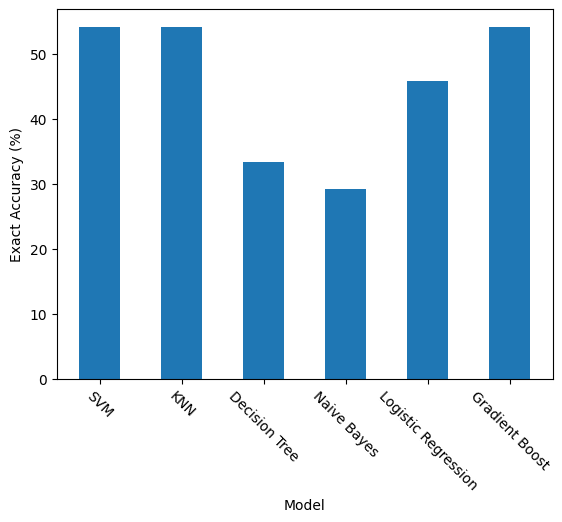

In [16]:
from src import results

results.plot_accuracy(acc)

In [17]:
df_limited_p1.to_csv(r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\notebooks\participant features\p1_limited.csv', index=False)
df_p2.to_csv(r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\notebooks\participant features\p2.csv', index=False)
df_p3.to_csv(r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\notebooks\participant features\p3.csv', index=False)